In [1]:
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from scipy.integrate import simps
from time import time 

import importlib

GOODS-S:   03h32m28.0008s -27d48m29.988s


Text(0.5, 1.0, 'SPT-Deep PA')

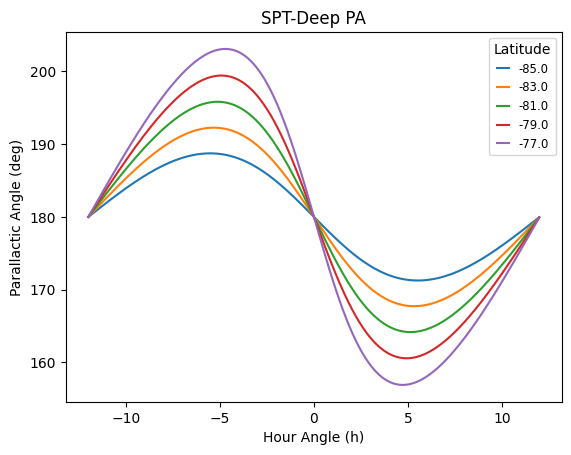

In [2]:
# Code from Dan

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord


def zenithAngle(dec,lat,HA):
	# source zenith angle (rad)
	# Input:
	#    dec (deg)
	#    lat (deg)
	#    HA  (hours)
	HArad = HA * np.pi/12; dec = np.radians(dec) ; lat = np.radians(lat)
	za = np.arccos(np.sin(lat) * np.sin(dec) + np.cos(lat) * np.cos(dec) * np.cos(HArad))
	return za

def elevationAngle(dec,lat,HA): 
	# source elevation angle (rad)
	# Input:
	#    dec (deg)
	#    lat (deg)
	#    HA  (hours)
	return np.pi/2 - zenithAngle(dec,lat,HA)

def azimuthAngle(dec,lat,HA):
	# source azimuth angle (rad)
	# Input:
	#    dec (deg)
	#    lat (deg)
	#    HA  (hours)
	za = zenithAngle(dec,lat,HA)
	HArad = HA * np.pi/12; dec = np.radians(dec) ; lat = np.radians(lat)
	cosAz = (np.sin(dec) - np.sin(lat) * np.cos(za))/(np.cos(lat) * np.sin(za))
	sinAz = np.sin(HArad) * np.cos(dec) / np.sin(za)
	return np.arctan2(sinAz,cosAz)

def parallacticAngle(dec,lat,HA,unwrapPA=True):
	# source parallactic angle (rad)
	# Input:
	#    dec (deg)
	#    lat (deg)
	#    HA  (hours)
    # Output:
    #    pa (rad)        
	HArad = HA * np.pi/12; dec = np.radians(dec) ; lat = np.radians(lat)
	pa = np.arctan2(np.sin(HArad), np.cos(dec) * np.tan(lat) - np.sin(dec) * np.cos(HArad))
	if unwrapPA == True:
		pa = np.unwrap(pa)
		if np.mean(pa)<0:
			pa = pa + 2*np.pi
	return pa

def declinationAngle(azi, alt, lat):

    azi = np.radians(azi); alt = np.radians(alt); lat = np.radians(lat)
    sinDec = np.sin(alt)*np.sin(lat) + np.cos(alt)*np.cos(lat)*np.cos(azi)
    return np.arcsin(sinDec)

    
def hourAngle(azi, alt, lat):
    dec = declinationAngle(azi, alt, lat)
    azi = np.radians(azi); alt = np.radians(alt); lat = np.radians(lat)
    cosHA = ( np.sin(alt)- np.sin(dec)*np.sin(lat) )/ (np.cos(dec)*np.cos(lat))
    return np.arccos(cosHA)*np.where((azi > 0)&(azi<=180), 1, -1)
    
# HA = np.arange(-5,5,0.04)
# lat=np.radians(19.82547)
# dec=np.radians(16.14821)
# pa = parallacticAngle(dec,lat,HA)
# el = elevationAngle(dec,lat,HA)
# za = zenithAngle(dec,lat,HA)


mcmLat = -77.83
minLat = -85
maxLat = -75
latList = np.arange(minLat,maxLat,2.)

# http://simbad.u-strasbg.fr/simbad/sim-id?Ident=GOODS+South+field
c=SkyCoord.from_name('Goods-S Field')
print('GOODS-S:   {0:}'.format(c.to_string('hmsdms')))
goodsSDec = c.dec.value
sptDeepDec = -55.

HA = np.arange(-12,12,.02)

elMCMgoods = elevationAngle(goodsSDec,mcmLat,HA)
paMCMgoods = parallacticAngle(goodsSDec,mcmLat,HA)
elMCMspt = elevationAngle(sptDeepDec,mcmLat,HA)
paMCMspt = parallacticAngle(sptDeepDec,mcmLat,HA)


elMin = np.radians(30.)
plt.clf()
plt.plot(HA[elMCMgoods>elMin],np.degrees(paMCMgoods[elMCMgoods>elMin]),label='GOODS-S')
plt.plot(HA[elMCMspt>elMin],np.degrees(paMCMspt[elMCMspt>elMin]),label='SPTDeep')
plt.xlabel('Hour Angle (h)'); #plt.xticks(np.arange(-6,6.1,1));
plt.ylabel('Parallactic Angle (deg)')
plt.legend(handlelength=1,loc='best',fontsize='small')
plt.title('PA from MCM')
# plt.savefig('mcmPA')

plt.clf()
for latVal in latList:
	elVals = elevationAngle(goodsSDec,latVal,HA)
	paVals = parallacticAngle(goodsSDec,latVal,HA)
	plt.plot(HA[elVals>elMin],np.degrees(paVals[elVals>elMin]),label=str(latVal))
plt.xlabel('Hour Angle (h)'); plt.xticks(np.arange(-6,6.1,1));
plt.ylabel('Parallactic Angle (deg)')
plt.legend(handlelength=1,loc='best',fontsize='small',title='Latitude')
plt.title('GOODS-S PA')
# plt.savefig('goodsPA')

plt.clf()
for latVal in latList:
	elVals = elevationAngle(sptDeepDec,latVal,HA)
	paVals = parallacticAngle(sptDeepDec,latVal,HA)
	plt.plot(HA[elVals>elMin],np.degrees(paVals[elVals>elMin]),label=str(latVal))
plt.xlabel('Hour Angle (h)'); # plt.xticks(np.arange(-12,12.1,1));
plt.ylabel('Parallactic Angle (deg)')
plt.legend(handlelength=1,loc='best',fontsize='small',title='Latitude')
plt.title('SPT-Deep PA')
# plt.savefig('sptPA')



In [3]:
HA = 0
dec= 0

alt = elevationAngle(dec,mcmLat,HA)
azi = azimuthAngle(dec,mcmLat,HA)

dec2  = declinationAngle(np.degrees(azi), np.degrees(alt), mcmLat)
ha2   = hourAngle(np.degrees(azi), np.degrees(alt), mcmLat)
np.degrees([dec2,ha2])

array([ 3.18055468e-15, -0.00000000e+00])

In [4]:
def genLocalPath(az_size = 1, alt_size = 1, alt_step=0.02, acc = 0.05, scan_v=0.05, dt= 0.01):
    '''
    Function that generates the local scaning pattern.
    Currently can only generate closed loop
    '''

    ver_N = int(alt_size//alt_step)

    scan_time = az_size/scan_v
    turn_time = 2*scan_v/acc

    a = np.concatenate((np.ones(int(turn_time/dt))*acc,np.zeros(int(scan_time/dt))))
    a = np.concatenate((a,-1*a))
    a = np.tile(a,ver_N)

    acc_alt = alt_step/(turn_time/2)**2
    a2 = np.concatenate((np.ones(int(turn_time/dt/2))*acc_alt,-1*np.ones(int(turn_time/dt/2))*acc_alt,np.zeros(int(scan_time/dt))))
    a2 = np.concatenate((np.tile(a2,ver_N),np.tile(-1*a2,ver_N)))

    flag = np.where(a==0,1,0) #constant scan speed part


    t = np.arange(0,len(a))*dt

    v = np.cumsum(a)*dt-scan_v
    az = np.cumsum(v)*dt

    v2 = np.cumsum(a2)*dt
    alt  = np.cumsum(v2)*dt
    
    return az,alt,flag  

def genScanPath(T, alt, az, flag):
    '''
    Function that generates the pointing coordinates vs time.
    T： time stream
    '''

    coor = np.zeros((len(T),2))

    idx = np.int_(np.fmod(T,len(alt)/100)*100)
    
    coor[:,0] = az[idx]-np.mean(az)
    coor[:,1] = alt[idx]-np.mean(alt)
    flag      = flag[idx]
    
    return coor,flag

def genPointingPath(T, scan_path, HA, lat, dec,):
    '''
    Function that takes local paths and generates the pointing on sky vs time.
    '''
    alt = elevationAngle(dec,lat,HA)+np.radians(scan_path[:,1])
    azi = azimuthAngle(dec,lat,HA)+np.radians(scan_path[:,0])
    
    dec_point = declinationAngle(np.degrees(azi), np.degrees(alt), lat)
    ha_point  = hourAngle(np.degrees(azi), np.degrees(alt), lat)
    
    return np.vstack((np.degrees(ha_point-HA*np.pi/12),np.degrees(dec_point))).T

def pixelOffset(pixel_num, pixel_pitch):
    '''
    Function that  gernerates the pixel offset vs pointing center
    pixel_num: number of spatial pixels
    pixel_pitch: spatial distance between adjacent pixels in degrees
    '''
    yoffsets = (np.arange(0,pixel_num)-pixel_num/2)*pixel_pitch
#     offsets = np.vstack((np.zeros(pixel_num),yoffsets)).T
    
    return yoffsets

def genPixelPath(pointing_path, pixel_offset, theta):
    '''
    Function that gernerates the pointing time stream for each pixel
    '''
    
    pixel_path = []
    for pixel in pixel_offset:   
        pixel_w_time = np.append( pixel*np.sin(theta), pixel*np.cos(theta),)
#         print(pixel_w_time)
        pixel_path.append(pointing_path+pixel_w_time) 
        
    return pixel_path

def bining(xedges,yedges,pointings):
    H, xedges, yedges = np.histogram2d(pointings[:,0], pointings[:,1], bins=(xedges, yedges))
    return H.T

def binMap(pointing_paths, res=0.02, f_range=1):
    '''
    Binning the pointing into 2d array
    '''

    x_range = f_range
    y_range = x_range

    x_res = res
    y_res = x_res

    xedges = np.arange(-x_range, x_range+x_res, x_res)
    yedges = dec+np.arange(-y_range, y_range+y_res, y_res)

    pointings = np.concatenate([pixel for pixel in pointing_paths])
    hit_map   = bining(xedges,yedges, pointings)
    return xedges,yedges,hit_map

### Local scan path

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Length: 132000


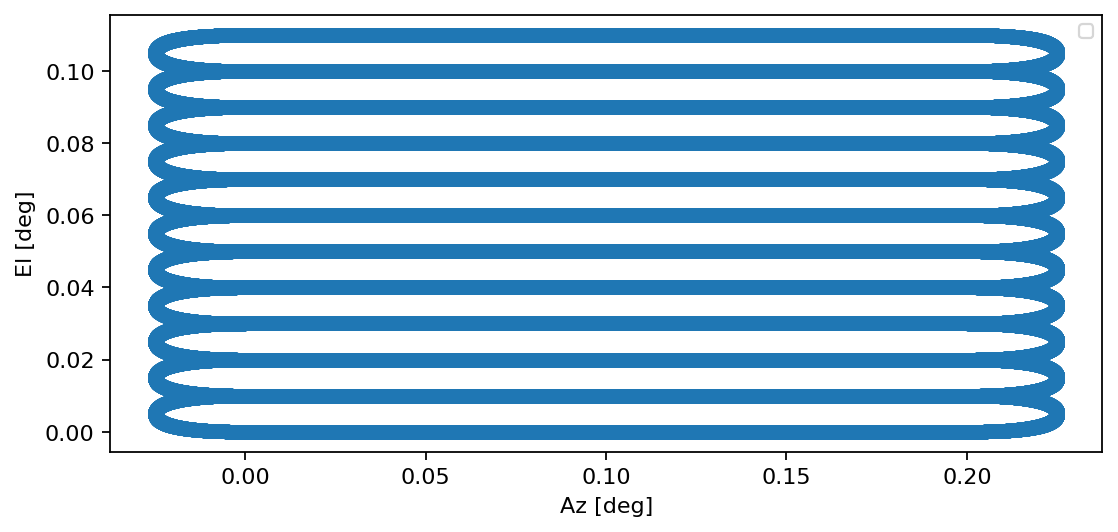

In [5]:

az, alt, flag = genLocalPath(az_size=0.2, alt_size=0.12, alt_step=0.01, acc=0.05, scan_v=0.05, dt=0.001)

print('Length:', len(az))

fig, ax = plt.subplots(figsize=(8,6), dpi=160)

plt.scatter(az,alt,lw=0.6)
# plt.plot(az[flag==1],alt[flag==1],lw=0.5,)
ax.set_aspect(aspect=1)

# plt.xlim([-.5,.5])
# plt.ylim([-.5,.5])

plt.xlabel('Az [deg]')
plt.ylabel('El [deg]')

plt.legend(frameon=1, fontsize=8)

# plt.savefig("scan_route.png")

### Scan efficiency

In [6]:
def scan_eff(az_size = 0.1):
    az, alt, flag = genLocalPath(az_size=az_size, alt_size=0.12, alt_step=0.01, acc=0.05, scan_v=0.05, dt=0.001)

    return np.sum(flag)/len(az)

az_sizes = np.arange(0.05,2.5,0.025)

eff = []

for az_size in az_sizes:
    eff.append(scan_eff(az_size=az_size))

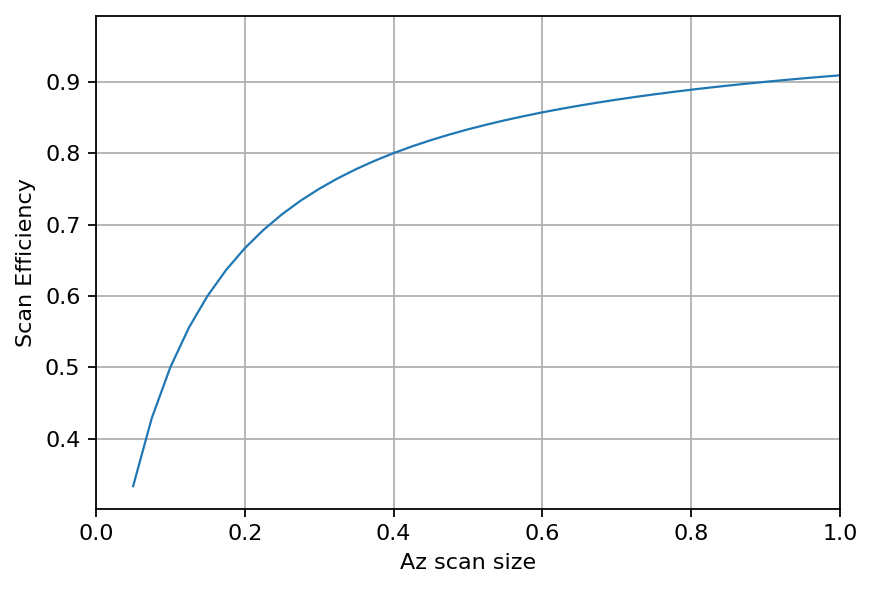

In [7]:

fig, ax = plt.subplots(figsize=(6,4), dpi=160)

plt.plot(az_sizes,eff,lw=1., label='Scan Efficiency')

plt.xlim([0,1])
# plt.ylim([0,1])
plt.ylabel('Scan Efficiency')
plt.xlabel('Az scan size')
plt.grid()
# plt.legend(frameon=1, fontsize=10)

# plt.savefig("scan_eff.png")

### Sky paths

In [8]:
goodsSDec = c.dec.value
sptDeepDec = -55.

mcmLat = -77.83
minLat = -85
maxLat = -75
latList = np.arange(minLat,maxLat,2.)

dec = goodsSDec


In [9]:

az_size=0.2

T_duration = 3600*15
dt = np.pi/3.14/122
T = np.arange(0,T_duration,dt)

HA = (-1*T_duration/2 + T)/3600.

az, alt, flag = genLocalPath(az_size=az_size, alt_size=0.08, alt_step=0.02, acc=0.05, scan_v=0.05, dt=0.001)
scan_path, scan_flag = genScanPath(T, alt, az, flag)

scan_path = scan_path#[scan_flag==1]
T_trim = T#[scan_flag==1]
HA_trim = HA#[scan_flag==1]

theta = np.radians(0)

pixel_offset = pixelOffset(64, 0.0148)

pixel_paths  = genPixelPath(scan_path, pixel_offset, theta)

#pixel_xy = np.array([-1*pixel_offset*np.sin(theta)-0.036*np.cos(theta), pixel_offset*np.cos(theta)-0.036*np.sin(theta)])
#pixel_xy_LW = np.array([-1*pixel_offset_LW*np.sin(theta)+0.036*np.cos(theta), pixel_offset_LW*np.cos(theta)+0.072*np.sin(theta)])#
# pixel_xy = np.array([-1*pixel_offset*np.sin(theta)+ 0.036*np.cos(theta), pixel_offset*np.cos(theta)+0.072*np.sin(theta)])
# pixel_xy_LW = np.array([-1*pixel_offset_LW*np.sin(theta)-0.036*np.cos(theta), pixel_offset_LW*np.cos(theta)-0.036*np.sin(theta)])

pointing_paths = [genPointingPath(T_trim, pixel_path, HA_trim, mcmLat, dec) for pixel_path in pixel_paths]

res=0.0033
f_range=0.6
xedges,yedges,hit_map = binMap(pointing_paths,res=res,f_range=f_range)


### export data

In [181]:

np.save('./TIM_deep_hits_for_Evan_202402/TIM_deep_sky_hits_az%1.2f'%(az_size), np.array(pointing_paths))

In [ ]:
A = np.load('./TIM_deep_hits_for_Ryan_202310/TIM_deep_sky_hits_az0.80.npy')
print(A.shape)


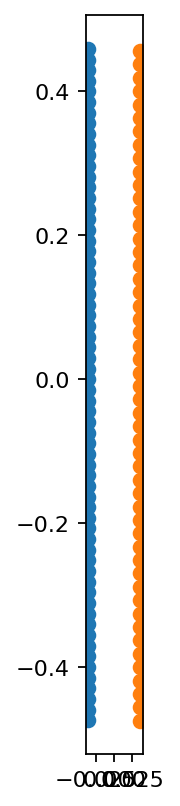

In [11]:
fig, ax = plt.subplots(figsize=(8,6), dpi=160)
plt.scatter(pixel_xy[0],pixel_xy[1],)
plt.scatter(pixel_xy_LW[0],pixel_xy_LW[1],)
ax.set_aspect(aspect=1)

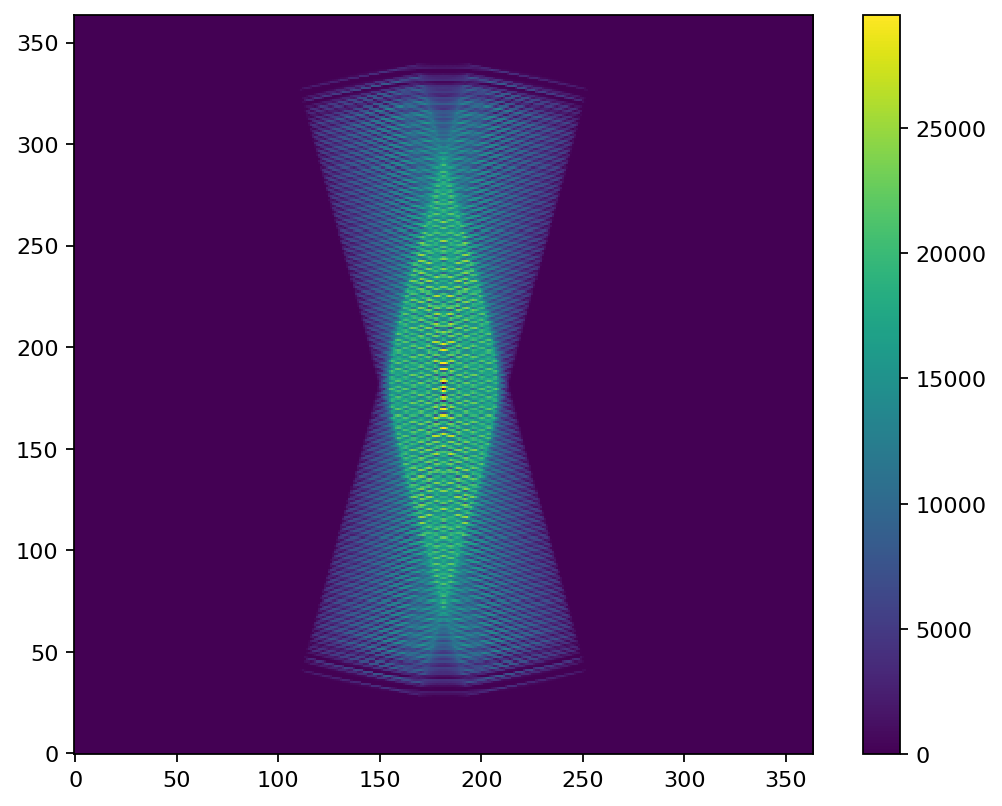

In [12]:
fig, (ax1) = plt.subplots(1, figsize=(8,6), dpi=160)
# fig.suptitle(t='TIM Deep field scan with az scan size = %1.1f deg\n'%az_sizes[i])


img = ax1.imshow((hit_map), \
    interpolation='nearest', origin='lower', vmin=0, vmax=np.max(hit_map), )
fig.colorbar(img, ax=ax1,)

# plt.ylim([150,200])
# plt.xlim([150,200])

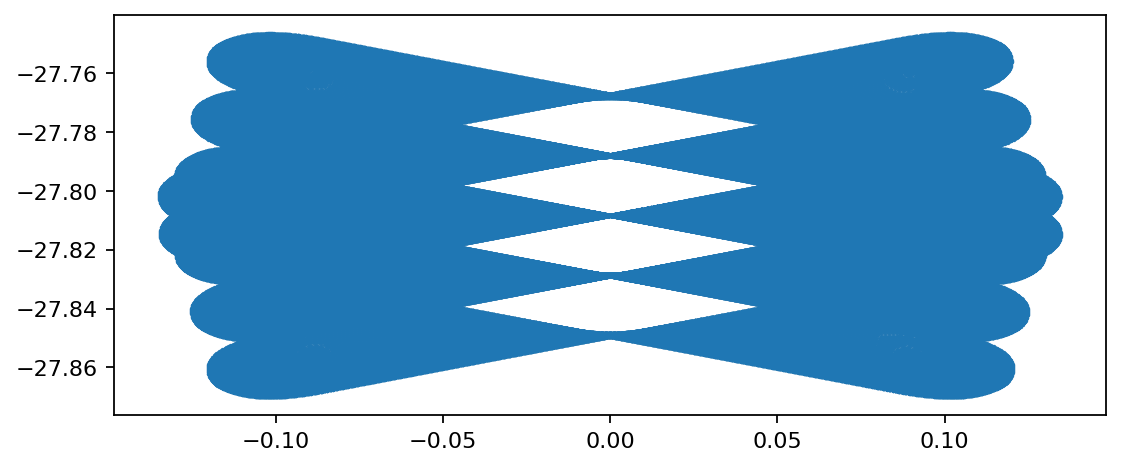

In [13]:
az_size = 0.2

T_duration = 3600*15
dt = np.pi/3.1/11
T = np.arange(0,T_duration,dt)

HA = (-1*T_duration/2 + T)/3600.

az, alt, flag = genLocalPath(az_size=az_size, alt_size=0.08, alt_step=0.02, acc = 0.05, scan_v=0.05, dt=0.001)
scan_path, scan_flag = genScanPath(T, alt, az, flag)

scan_path_sky = genPointingPath(T, scan_path, HA, mcmLat, dec)

N1 =  0
N2 = -1
dN =  1

fig, ax = plt.subplots(figsize=(8,6), dpi=160)

scat = ax.scatter(scan_path_sky[N1:N2:dN,0], scan_path_sky[N1:N2:dN,1], s=1., lw=0.5, alpha=.8)

# plt.xlim([-0.06,-0.045])
# plt.ylim([-27.8,-27.78])
ax.set_aspect(aspect=np.abs(round(np.cos(np.radians(dec)),2)))


plt.show()

In [29]:

import matplotlib.animation as animation

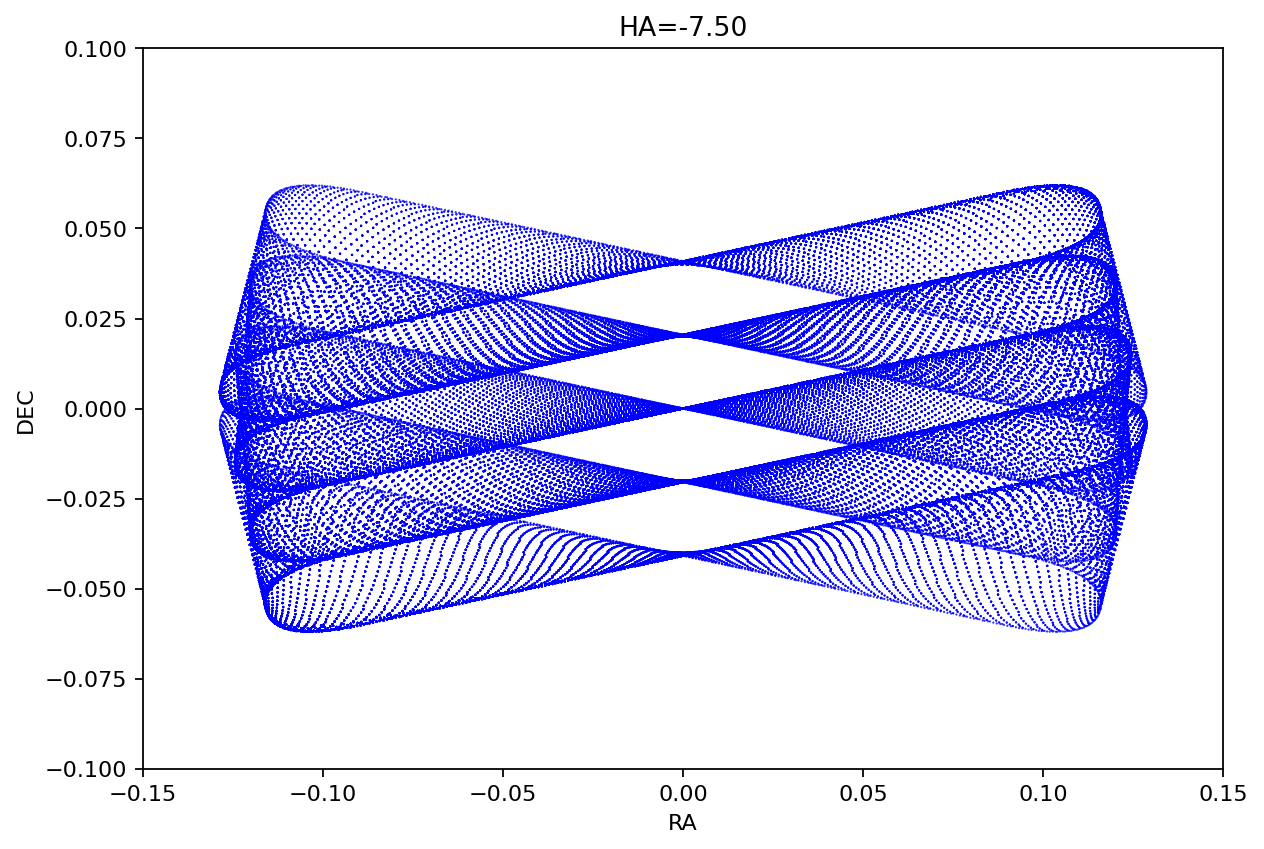

In [122]:
az_size = 0.2
dec = 0

T_duration = 3600*15
dt = np.pi/7
T = np.arange(0,T_duration,dt)

HA = (-1*T_duration/2 + T)/3600.

az, alt, flag = genLocalPath(az_size=az_size,alt_size=0.08,alt_step=0.02)
scan_path, scan_flag = genScanPath(T, alt, az, flag)

scan_path_sky = genPointingPath(T, scan_path, HA, mcmLat, dec)

N1 = 0
N2 = 1
dN =  7
multi = 8000

fig, ax = plt.subplots(figsize=(8,6), dpi=160)

scat = ax.scatter(scan_path_sky[N1:N2:dN,0], scan_path_sky[N1:N2:dN,1], c='b', s=1., lw=0.5, alpha=.8)

plt.xlim([-0.15,0.15])
plt.ylim([dec-0.1,dec+0.1])
ax.set_aspect(aspect=1/np.abs(round(np.cos(np.radians(dec)),2)))

ax.set_xlabel("RA")
ax.set_ylabel("DEC")

ax.set_title("HA=%1.2f"%HA[0])

plt.tight_layout()

def animate(i):
    scat = ax.scatter(scan_path_sky[N1:i*multi:dN,0], scan_path_sky[N1:i*multi:dN,1], c='b', s=1., lw=0.5, alpha=.8)
    ax.set_title("HA=%1.2f"%HA[i*multi])
    return scat,

ani = animation.FuncAnimation(fig, animate, repeat=True,
                                    frames=len(T)//multi, interval=100)

# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=10,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
ani.save('Scan_demo_dec0.gif', writer=writer)

# plt.show()

/usr/local/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)


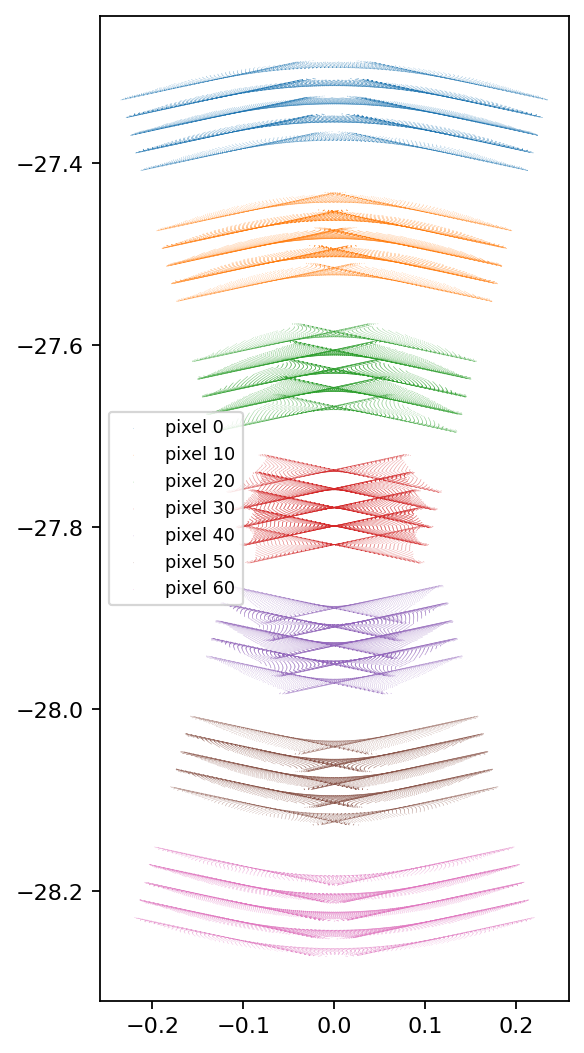

In [147]:
fig, ax = plt.subplots(figsize=(6,8), dpi=160)

idx = np.arange(len(pixel_paths))[::10]

n = 11

for i in idx:
    plt.scatter(pointing_paths[i][::n,0], pointing_paths[i][::n,1], s=0.1, alpha=0.5, label= 'pixel %d'%i)
#     plt.plot(pointing_paths[i][:,0], pointing_paths[i][:,1], lw=0.1, alpha=0.6, label= 'pixel %d'%i)
ax.set_aspect(aspect=1)
plt.legend(frameon=1, fontsize=8)

# plt.savefig("pixel_pointing_demo.png", dpi=160)

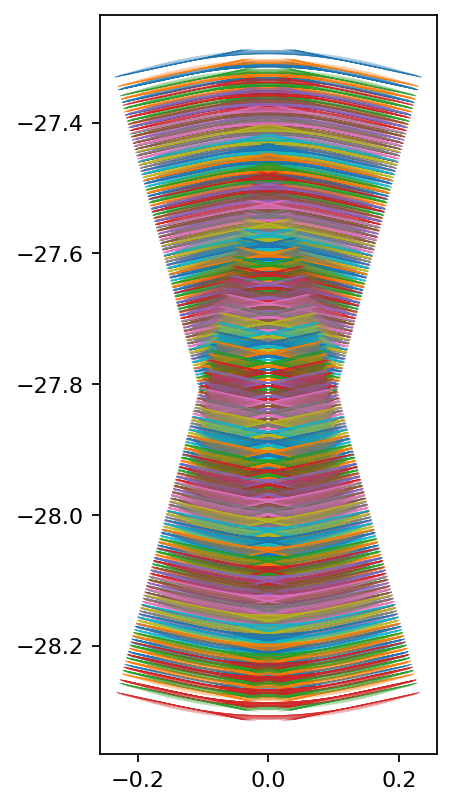

In [149]:

fig, ax = plt.subplots(figsize=(8,6), dpi=160)

idx = np.arange(len(pixel_paths))

n=3

for i in idx:
    plt.scatter(pointing_paths[i][::n,0], pointing_paths[i][::n,1], s=0.1, alpha=0.3, )
ax.set_aspect(aspect=1)


# plt.legend(frameon=1, fontsize=8)

# plt.savefig("sky_pixel_dec%d_%1.2f_wide_hits_LW.png"%(np.rint(dec),az_size))

In [319]:
# GoodsSouthEdge = np.array([[-27.7,53], [-27.96,53.09], [-27.9,53.26], [-27.65,53.16], [-27.7,53]])

GOODSS_outline = np.loadtxt("./GOODS_south_outline.txt")
CANDELS_outline = np.loadtxt("./footprint/CANDELS_footprint.tsv")

x_cen, y_cen = CANDELS_outline.mean(axis=0)

/var/folders/r3/qm4t87jj1yd0kp301zft21_w0000gp/T/ipykernel_835/441170322.py:13: UserWarning: The following kwargs were not used by contour: 'lw'
  CS = ax1.contour(np.roll(np.sqrt(hit_map*np.roll(hit_map, 4, axis=1)),-2,axis=1), levels=[0.5*np.max(hit_map)], lw=0.5, origin='lower', linewidths=0.6,\


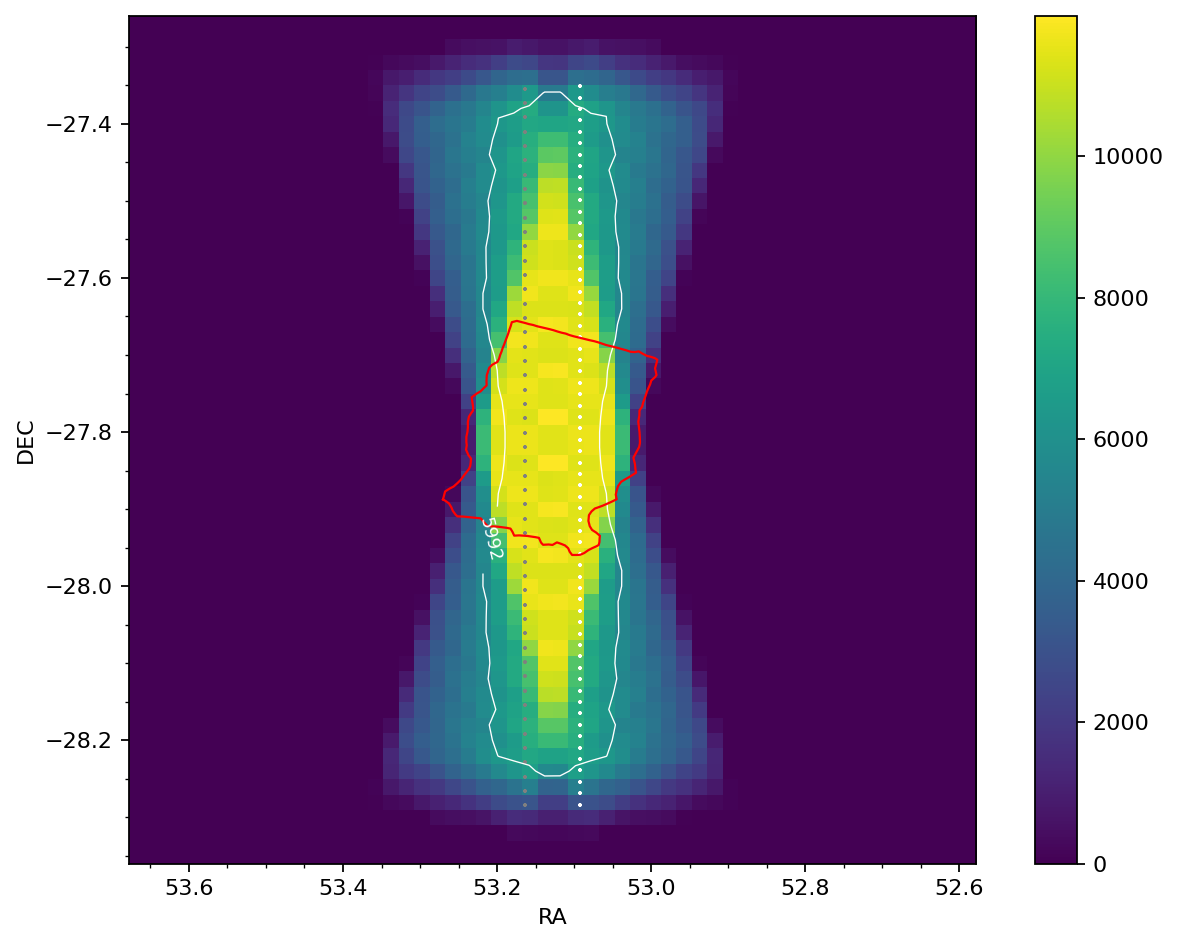

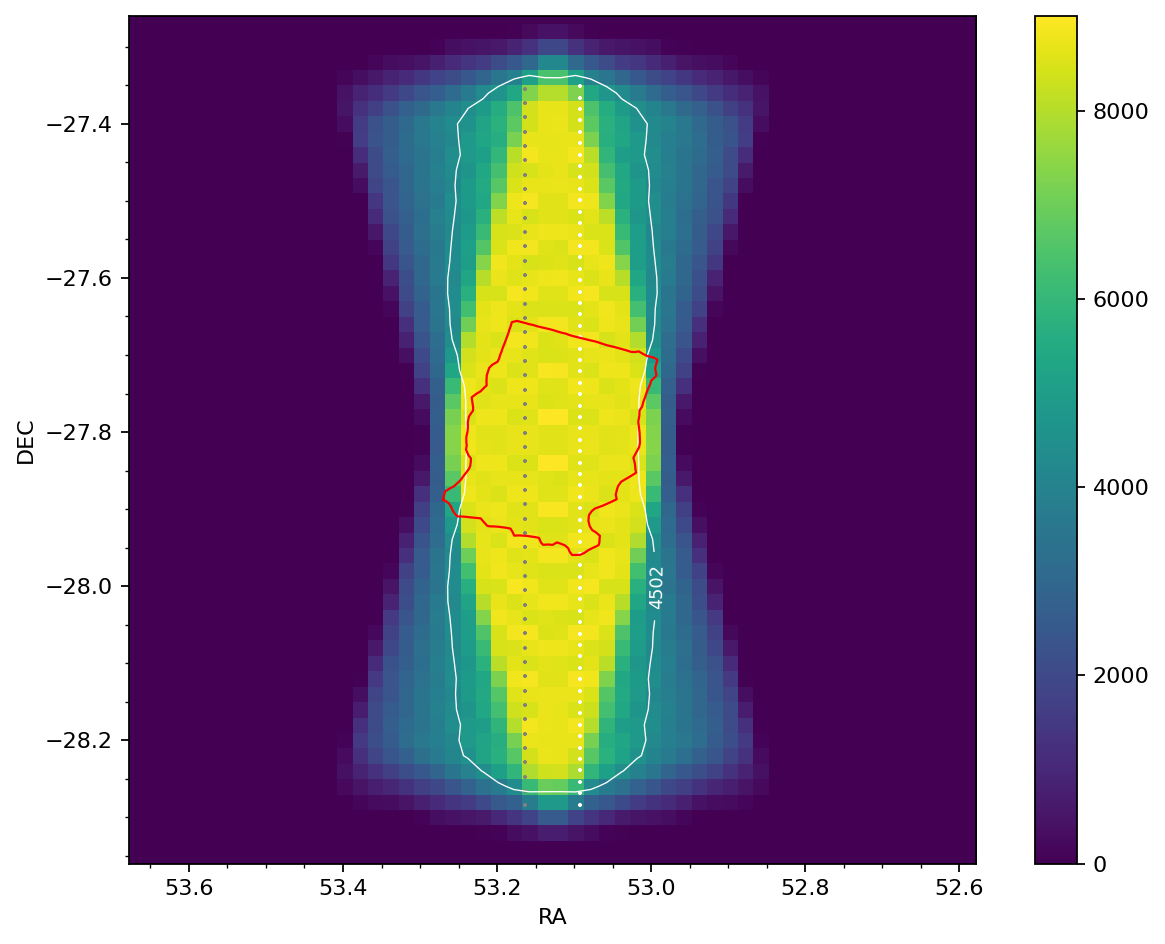

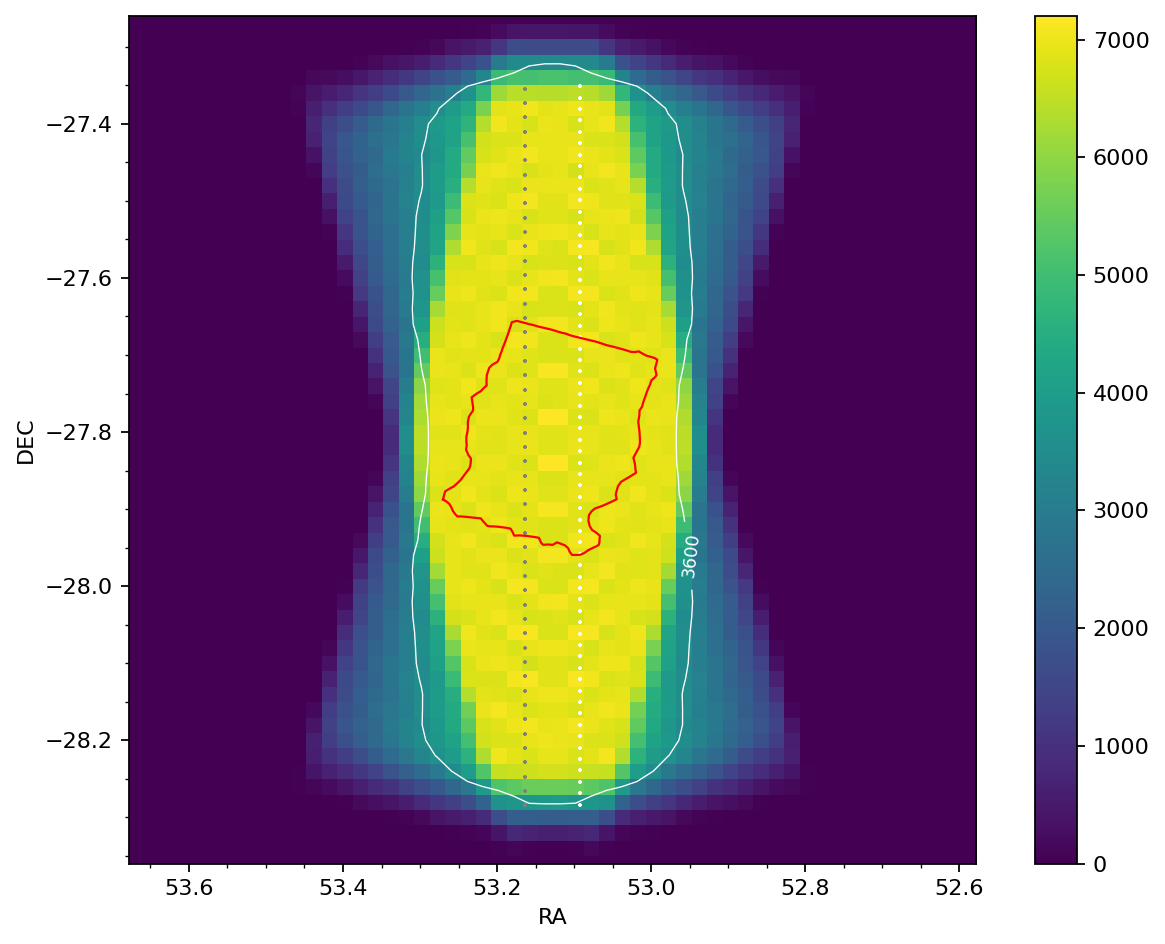

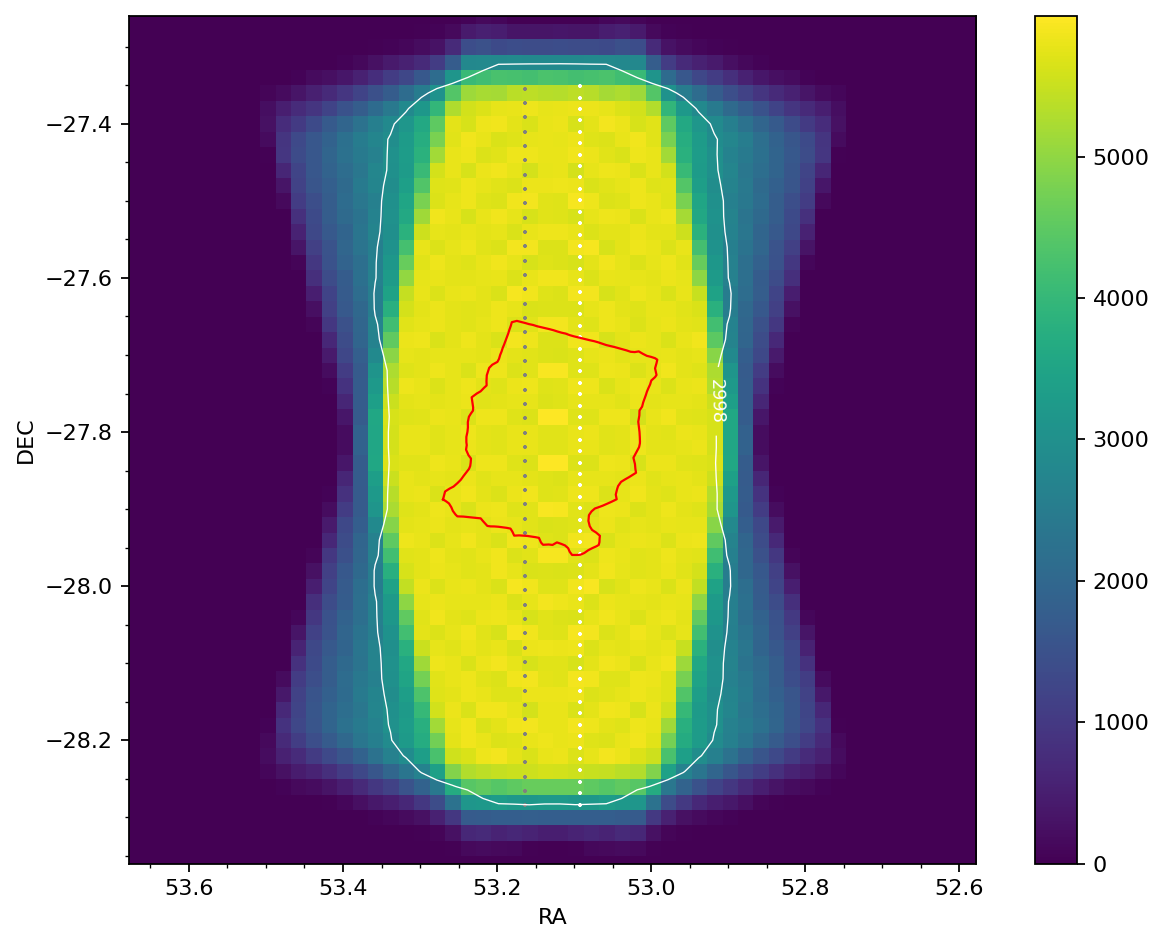

In [332]:
savefig = 0

for i, hit_map in enumerate(hit_maps): 

    fig, (ax1) = plt.subplots(1, figsize=(8,6), dpi=160)
    # fig.suptitle(t='TIM Deep field scan with az scan size = %1.1f deg\n'%az_sizes[i])

    maps = f_range
    img = ax1.imshow((hit_map), extent=[x_cen-maps, x_cen+maps,y_cen-maps, y_cen+maps,], \
        interpolation='nearest', origin='lower', vmin=0, vmax=np.max(hit_map), )
    fig.colorbar(img, ax=ax1,)
    
    CS = ax1.contour(np.roll(np.sqrt(hit_map*np.roll(hit_map, 4, axis=1)),-2,axis=1), levels=[0.5*np.max(hit_map)], lw=0.5, origin='lower', linewidths=0.6,\
                extent=[x_cen-maps, x_cen+maps,y_cen-maps, y_cen+maps,], colors='w')

    # CS = ax1.contour(hit_map, levels=[0.5*np.max(hit_map)], lw=0.5, origin='lower', linewidths=0.6,\
    #             extent=[x_cen-maps, x_cen+maps,y_cen-maps, y_cen+maps,], colors='w')
    ax.clabel(CS, inline=1, fontsize=8, )
    
    # img.set_clim(0,10000)

    ax1.scatter(pixel_xy[0]+x_cen, pixel_xy[1]+y_cen, s=2, marker='+', c='white',label='SW Spatial Pixels')
    ax1.scatter(pixel_xy_LW[0]+x_cen,pixel_xy_LW[1]+y_cen, s=2, marker='+', c='grey', label='LW Spatial Pixels')


    ax1.plot(CANDELS_outline[:,0], CANDELS_outline[:,1], 'r-', lw=1, label='CANDELS')

    ax1.set_aspect(aspect=1)

    s = 0.55
    ax1.set_xlim([x_cen+s, x_cen-s,])
    ax1.set_ylim([y_cen-s, y_cen+s,])

    ax1.set_xlabel("RA")
    ax1.set_ylabel("DEC")

    ax1.minorticks_on()
    ax1.tick_params(which='minor', direction='out')

    # ax1.legend(frameon=1, fontsize=8)

    plt.tight_layout()

    if savefig:
        plt.savefig("sky_hitmap_deep_az%1.2f_15hrs_V4.png"%(az_sizes[i]), dpi=200)

In [243]:
def timeFractionAbove(hmap, level):
    hits = hmap.flatten()
    return np.sum(hits[hits>level])/np.sum(hits)

In [245]:
frac = timeFractionAbove(hit_maps[2],5000)
frac

0.7480514039008154

In [334]:
def hitsPerSqdeg(area):
    return total_hits/(area/res**2)

hitsPerSqdeg(0.2)*300/200


15401.216

In [321]:
i=2
hits = hit_maps[i].flatten()

total_hits = len(T)*64
np.sum(hits)/total_hits

0.800136300925849

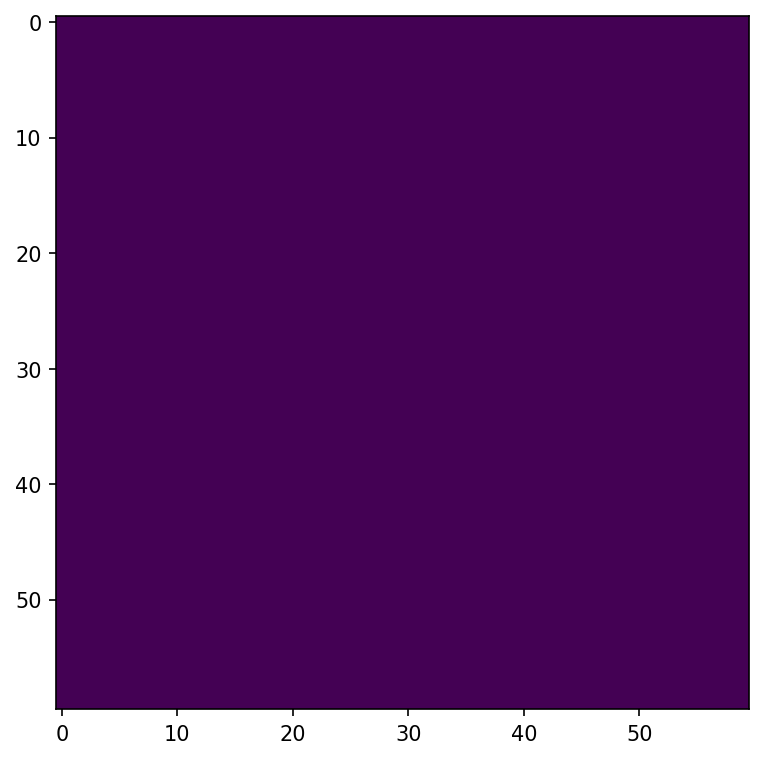

In [264]:

plt.imshow(hit_map)

0.7270047169811321


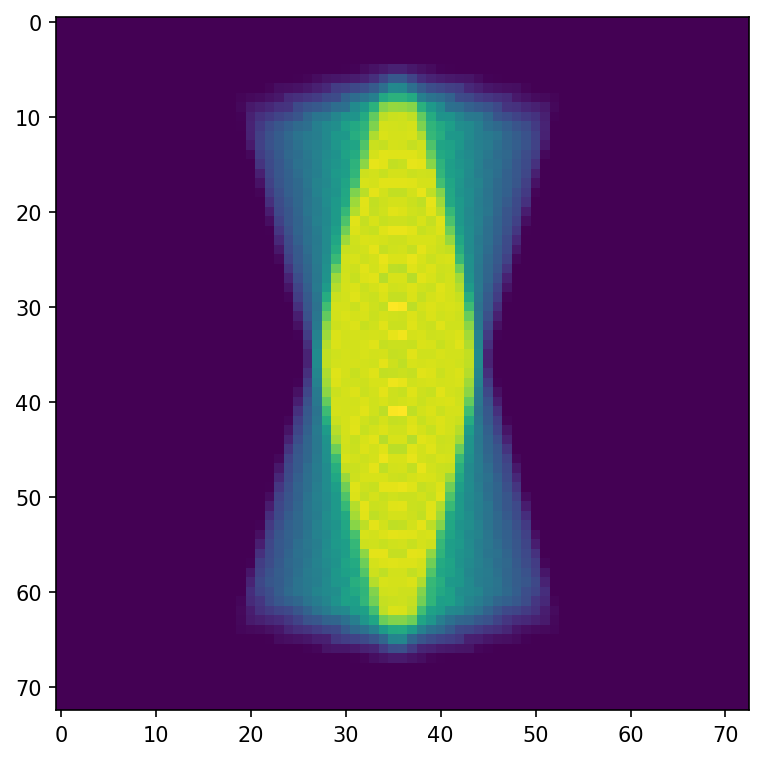

In [120]:
i=0
hits = hit_maps[i].flatten()

print(np.sum(hits>2000)/np.sum(hits>10))
plt.imshow(hit_maps[i])

### Ramdom stuff I haven't clean up lol

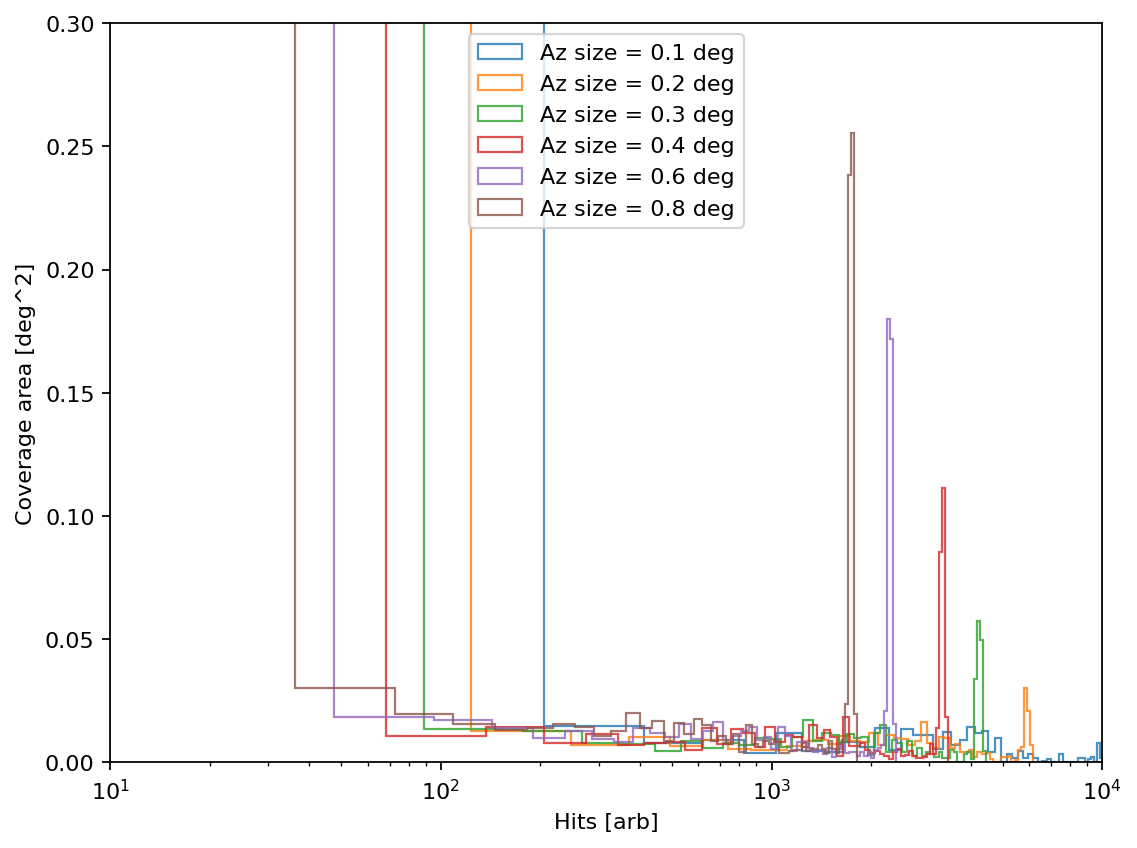

In [89]:

fig, ax = plt.subplots(figsize=(8,6), dpi=160)

for i, hit_map in enumerate(hit_maps): 

    plt.hist(hit_map.flatten(), bins=50, weights=np.ones(len(hit_map.flatten())) *res**2,
         histtype='step', alpha=0.8, label='Az size = %1.1f deg'%az_sizes[i])

plt.xlabel('Hits [arb]')
plt.ylabel('Coverage area [deg^2]')

plt.xlim([10,10000])
plt.ylim([0,.3])

plt.xscale('log')

plt.legend()


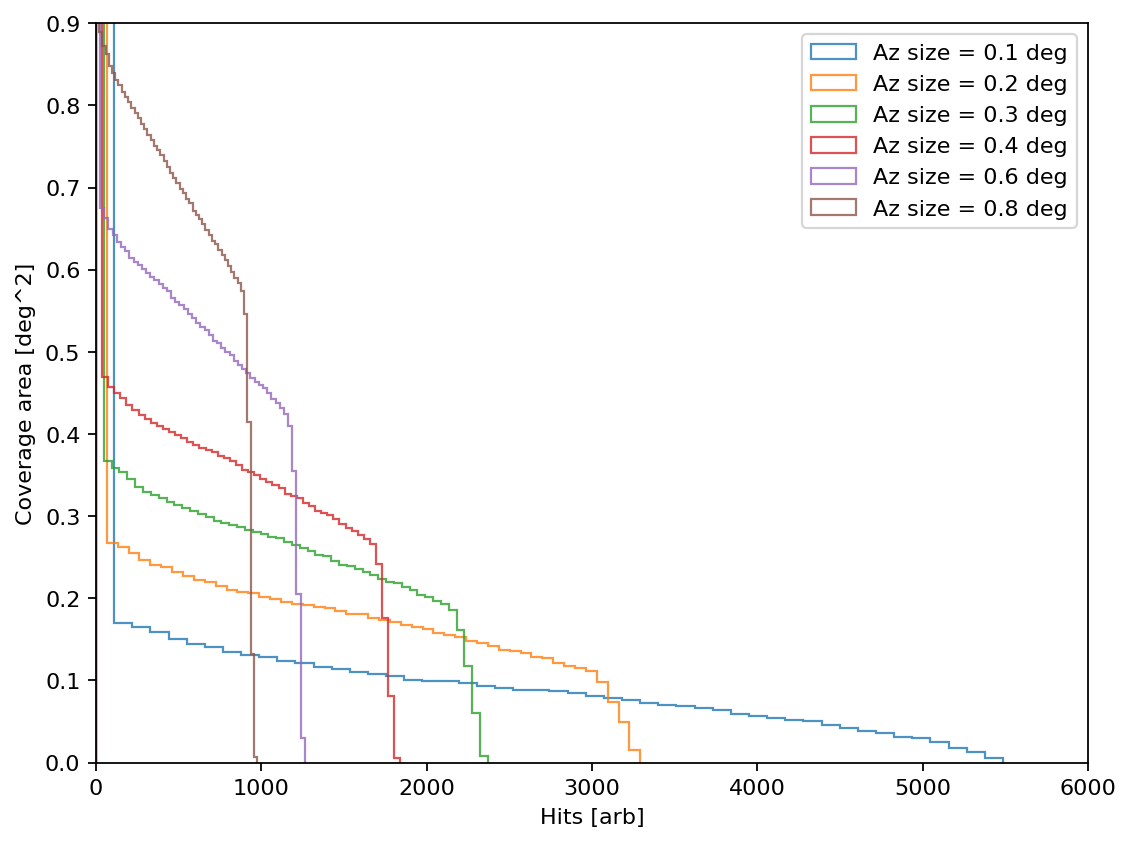

In [21]:

fig, ax = plt.subplots(figsize=(8,6), dpi=160)

for i, hit_map in enumerate(hit_maps): 

    plt.hist(hit_map.flatten(), bins=50, cumulative=-1, weights=np.ones(len(hit_map.flatten())) *res**2,
         histtype='step', alpha=0.8, label='Az size = %1.1f deg'%az_sizes[i])

plt.xlabel('Hits [arb]')
plt.ylabel('Coverage area [deg^2]')

plt.xlim([0,6000])
plt.ylim([0,.9])

plt.legend()

# plt.savefig("sky_hitmap_deep_hits_compare.png")

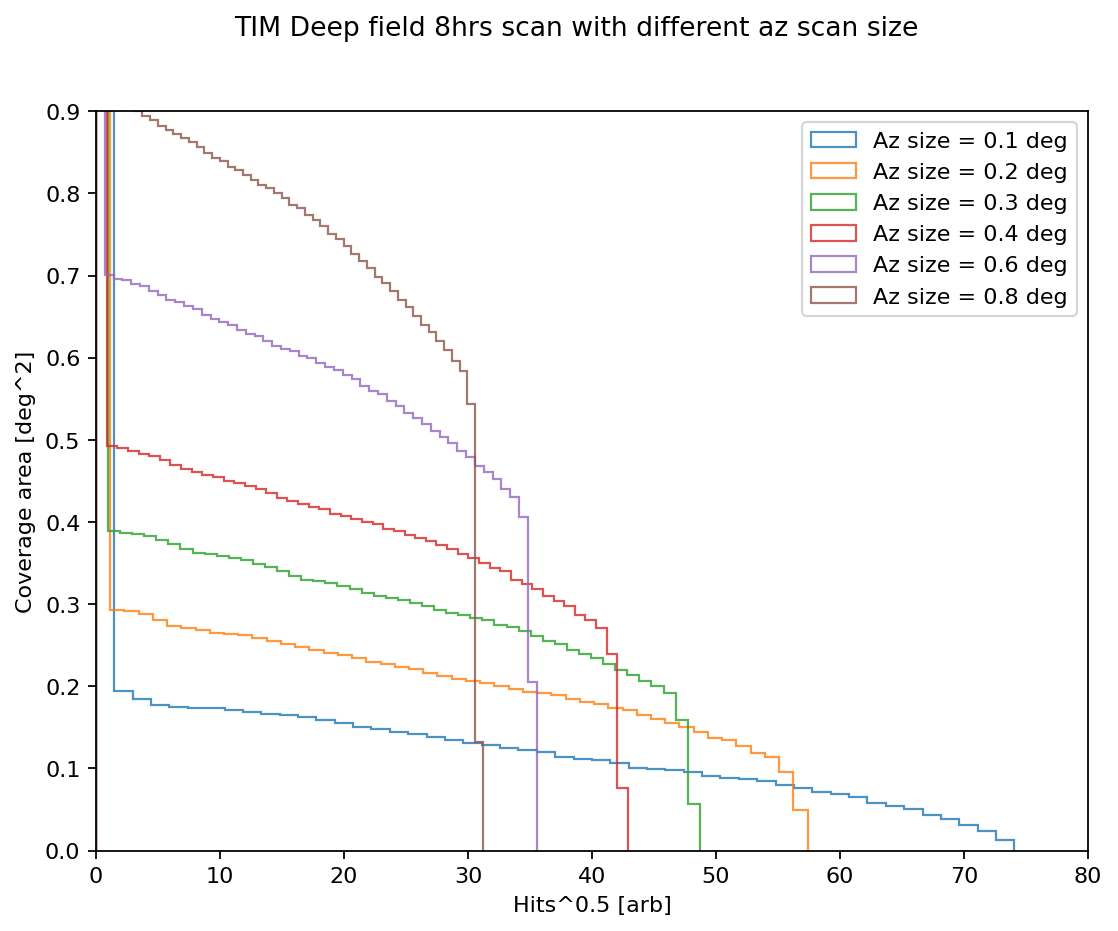

In [22]:
fig, ax = plt.subplots(figsize=(8,6), dpi=160)

fig.suptitle(t='TIM Deep field 8hrs scan with different az scan size')

for i, hit_map in enumerate(hit_maps): 
    depth = (hit_map.flatten())**0.5
    plt.hist(depth, bins=50, cumulative=-1, weights=np.ones(len(depth)) *res**2,
         histtype='step', alpha=0.8, label='Az size = %1.1f deg'%az_sizes[i])


plt.xlabel('Hits^0.5 [arb]')
plt.ylabel('Coverage area [deg^2]')

plt.xlim([0,80])
plt.ylim([0,0.9])

plt.legend()

plt.savefig("sky_hitmap_deep_depth_compare_8hrs.png")

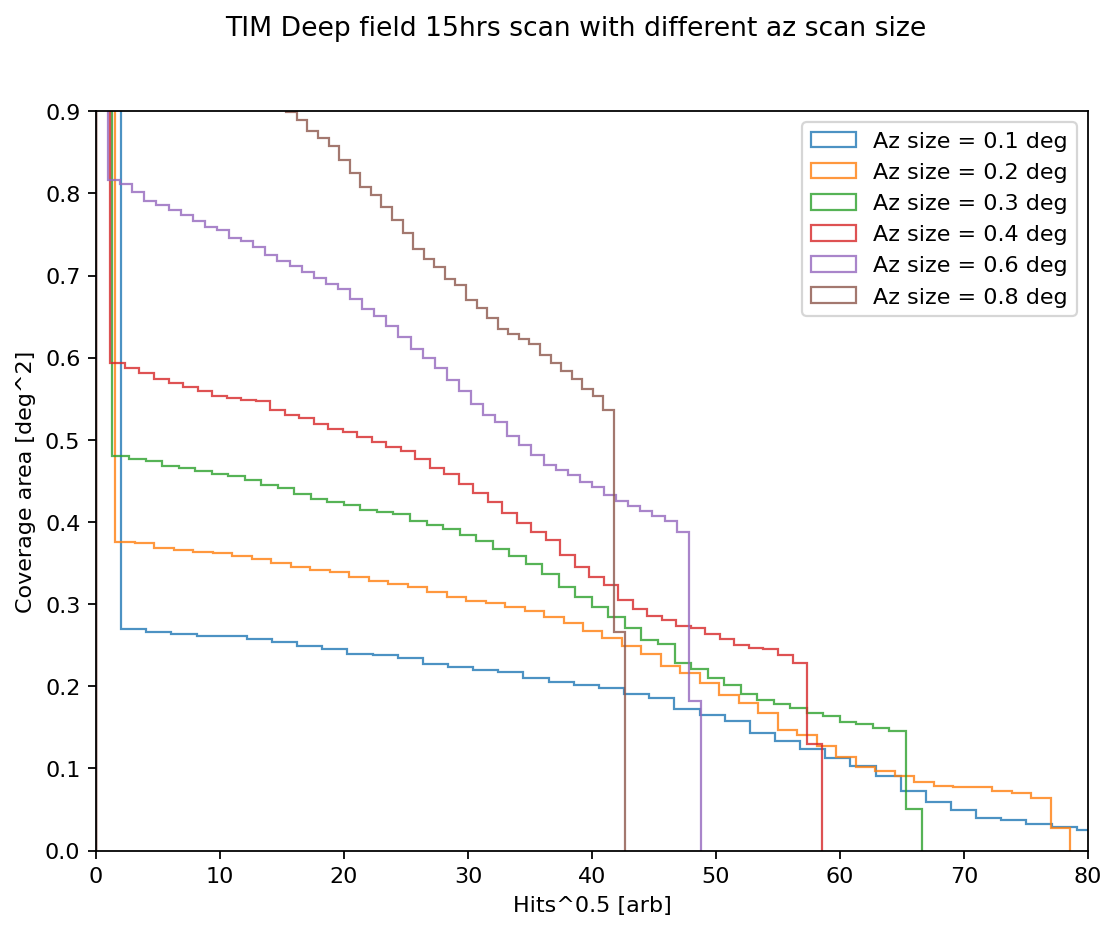

In [44]:
fig, ax = plt.subplots(figsize=(8,6), dpi=160)

fig.suptitle(t='TIM Deep field 15hrs scan with different az scan size')

for i, hit_map in enumerate(hit_maps): 
    depth = (hit_map.flatten())**0.5
    plt.hist(depth, bins=50, cumulative=-1, weights=np.ones(len(depth)) *res**2,
         histtype='step', alpha=0.8, label='Az size = %1.1f deg'%az_sizes[i])


plt.xlabel('Hits^0.5 [arb]')
plt.ylabel('Coverage area [deg^2]')

plt.xlim([0,80])
plt.ylim([0,0.9])

plt.legend()

plt.savefig("sky_hitmap_deep_depth_compare_15hrs.png")

In [76]:
fftmap_0 = np.fft.fftshift((np.fft.fft2(hit_map_0)))
fftmap_45 = np.fft.fftshift((np.fft.fft2(hit_map_45)))
fftmap_90 = np.fft.fftshift((np.fft.fft2(hit_map_90)))

In [149]:
fftmap_0_wide = np.fft.fftshift((np.fft.fft2(hit_map_0_wide)))

In [162]:
fig, ax = plt.subplots(figsize=(8,6), dpi=160)

fftmap =np.abs(np.fft.fftshift((np.fft.fft2(hit_map_0))))

img = plt.imshow(fftmap, interpolation='nearest', origin='lower', norm=colors.LogNorm(vmax=np.max(fftmap))\
         )

plt.colorbar()
plt.clim(10,1e7)

ax.set_aspect(aspect=1)


# plt.xlim([-.5,.5])
# plt.ylim([-.5,.5])

# plt.yscale('log')
# plt.xscale('log')
# 
# plt.legend(frameon=1, fontsize=8)

# plt.savefig("sky_pixel_dec27_%d_fft_log.png"%np.rint(np.degrees(theta)))

IndentationError: unexpected indent (<ipython-input-162-55e775fb822d>, line 6)

In [102]:
angle_size = 3600*5.653/1000*2 # Mpc h^-1/deg @z=1
l = fftmap_0.shape[1]
dfx = 1/(2*f_range*angle_size)

r  = np.linspace(1,l/2,num=l/2)

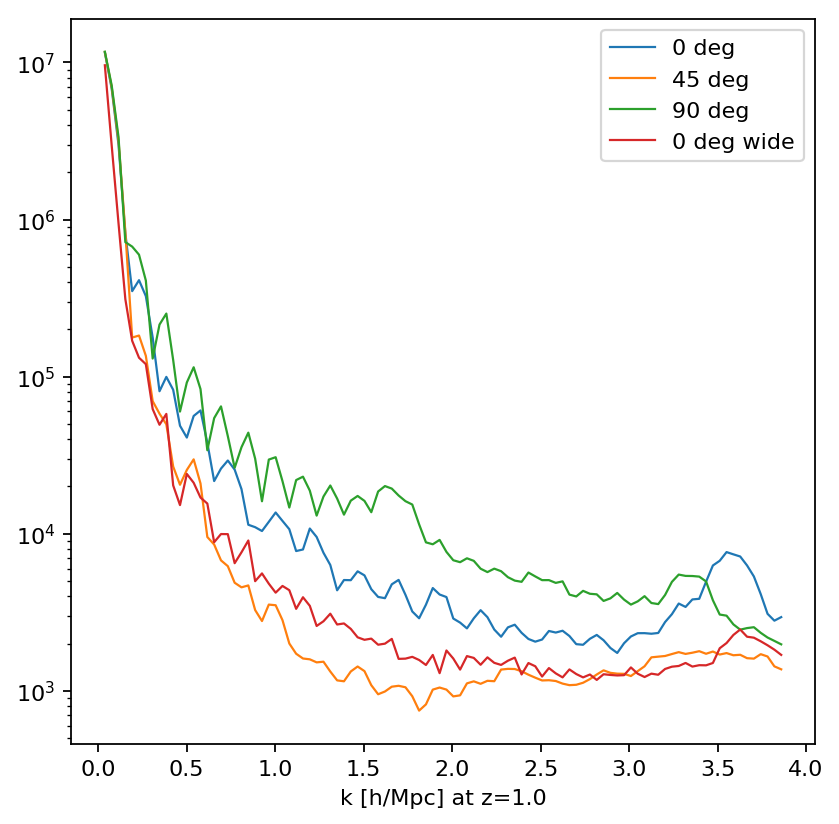

In [153]:
# create array of radii
l = fftmap_0.shape[1]
x,y = np.meshgrid(np.arange(fftmap_0.shape[1]),np.arange(fftmap_0.shape[0]))
R = np.sqrt((x-l/2)**2+(y-l/2)**2)



# plot it
fig,ax=plt.subplots(figsize=(6,6), dpi=160)
plt.plot(r1*dfx*2*np.pi,azi_mean(np.abs(fftmap_0)), lw=1, label='0 deg')
plt.plot(r1*dfx*2*np.pi,azi_mean(np.abs(fftmap_45)), lw=1,label='45 deg')
plt.plot(r1*dfx*2*np.pi,azi_mean(np.abs(fftmap_90)), lw=1,label='90 deg')
plt.plot(r1*dfx*2*np.pi,azi_mean(np.abs(fftmap_0_wide)), lw=1,label='0 deg wide')


plt.xlabel('k [h/Mpc] at z=1.0')
plt.ylabel('')

# plt.xscale('log')
plt.yscale('log')

plt.legend()

# plt.savefig("hitmap_fft_lin.png"%np.rint(np.degrees(theta)))

In [183]:
fig,ax=plt.subplots(figsize=(6,6), dpi=160)

pixelSize = 0.02**2

plt.plot(np.cumsum(hit_map_0), lw=1, label='0 deg')
plt.plot(np.cumsum(hit_map_45), lw=1, label='45 deg')
plt.plot(np.cumsum(hit_map_90), lw=1, label='90 deg')
plt.plot(np.cumsum(hit_map_0_wide), lw=1, label='0 deg wide')

plt.xlim([1e4,3e4])

plt.legend()

SyntaxError: invalid syntax (<ipython-input-183-8c7e60e835bf>, line 10)

In [80]:
# calculate the azimuthal average
def azi_mean(fftmap,dr=1):
    l = fftmap.shape[1]
    x,y = np.meshgrid(np.arange(l),np.arange(l))
    R = np.sqrt((x-l/2)**2+(y-l/2)**2)
    
    f = lambda r : fftmap[(R >= r-dr/2) & (R < r+dr/2)].mean()
    r  = np.linspace(1, l/2, num=l/2/dr)
    mean = np.vectorize(f)(r)
    return mean

In [163]:


fftmap_0_n = fftmap_0/np.sum(np.abs(fftmap_0)**2)
fftmap_45_n = fftmap_45/np.sum(np.abs(fftmap_45)**2)
fftmap_90_n = fftmap_90/np.sum(np.abs(fftmap_90)**2)

r1  = np.linspace(1, l/2, num=l/2)

# plot it
fig,ax=plt.subplots(figsize=(6,6), dpi=160)
plt.plot(r1*dfx*2*np.pi,azi_mean(np.abs(fftmap_0_n)), label='0 deg')
plt.plot(r1*dfx*2*np.pi,azi_mean(np.abs(fftmap_45_n)), label='45 deg')
plt.plot(r1*dfx*2*np.pi,azi_mean(np.abs(fftmap_90_n)), label='90 deg')


plt.xlabel('k [h/Mpc] at z=1.0')
plt.ylabel('')

# plt.xscale('log')
plt.yscale('log')

plt.legend()

# plt.savefig("hitmap_fft_lin_normed.png"%np.rint(np.degrees(theta)))

SyntaxError: invalid syntax (<ipython-input-163-d70b6fa20f85>, line 20)

In [339]:
l=200
x,y = np.meshgrid(np.arange(l),np.arange(l))
R = np.sqrt((x-l/2)**2+(y-l/2)**2)

cir = R*0
cir[R<95] =0.3

grid = R*0
grid[x%10==0]=1 

In [154]:
N = 1000

means = []
means_scaned0 = []
means_scaned0_w = []
means_scaned45 = []
means_scaned90 = []

for i in range(N):
    rand = np.random.normal(loc=0.0, scale=1.0, size=(200,200))
    rd_fft = np.abs(np.fft.fftshift((np.fft.fft2(rand))))
    rd_fft_scaned0 = np.abs(np.fft.fftshift((np.fft.fft2(rand*hit_map_0))))
    rd_fft_scaned0_w = np.abs(np.fft.fftshift((np.fft.fft2(rand*hit_map_0_wide))))
    rd_fft_scaned45 = np.abs(np.fft.fftshift((np.fft.fft2(rand*hit_map_45))))
    rd_fft_scaned90 = np.abs(np.fft.fftshift((np.fft.fft2(rand*hit_map_90))))
    
    
    means.append(azi_mean((rd_fft)**2,2))
    means_scaned0.append(azi_mean((rd_fft_scaned0)**2,2))
    means_scaned0_w.append(azi_mean((rd_fft_scaned0_w)**2,2))
    means_scaned45.append(azi_mean((rd_fft_scaned45)**2,2))    
    means_scaned90.append(azi_mean((rd_fft_scaned90)**2,2))

In [112]:
r  = np.linspace(1,l/2,num=l/4)
k  = r*dfx*2*np.pi

Text(0.5, 0, 'k [h/Mpc] at z=1.0')

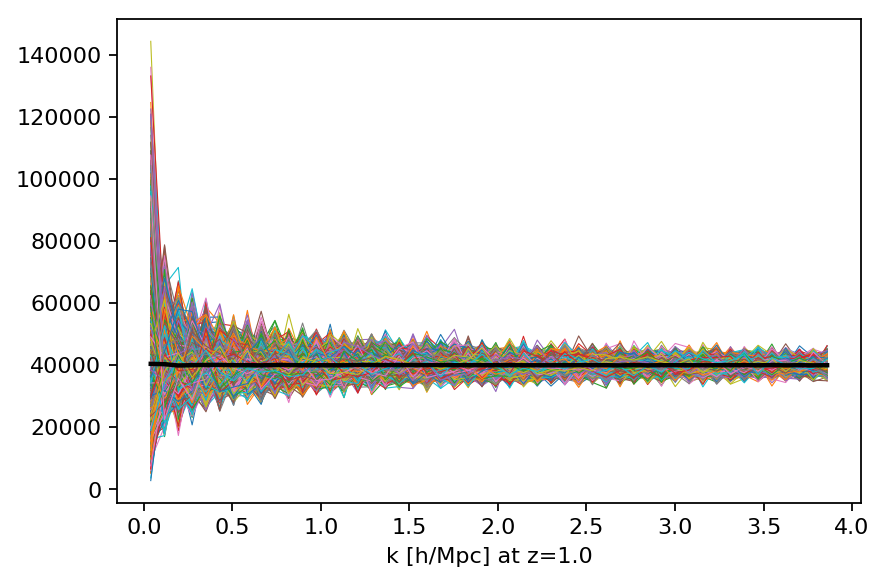

In [134]:
fig,ax=plt.subplots(figsize=(6,4), dpi=160)



for i in range(N):
    plt.plot(k, means[i], lw=0.5, label='0 deg')
    
plt.plot(k, sum(means)/len(means), 'k', lw=2, label='0 deg')

# plt.xscale('log')

plt.xlabel('k [h/Mpc] at z=1.0')

Text(0.5, 0, 'k [h/Mpc] at z=1.0')

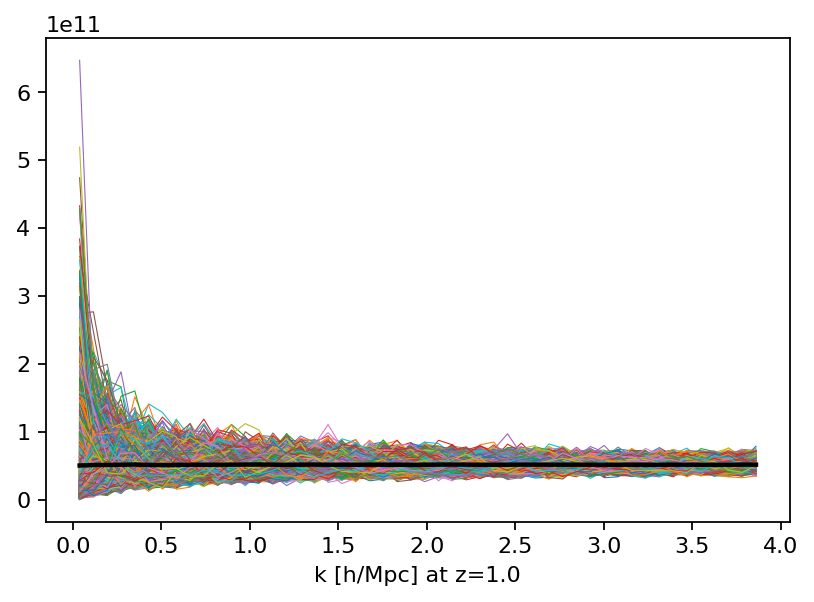

In [158]:
fig,ax=plt.subplots(figsize=(6,4), dpi=160)

for i in range(N):
    plt.plot(k, means_scaned0[i], lw=0.5, label='0 deg')
    
plt.plot(k, sum(means_scaned0)/len(means_scaned0), 'k', lw=2, label='0 deg')

# plt.xscale('log')

plt.xlabel('k [h/Mpc] at z=1.0')

In [89]:
means = np.array(means)
means_scaned0 = np.array(means_scaned0)
means_scaned45 = np.array(means_scaned45)
means_scaned90 = np.array(means_scaned90)

In [91]:
def stdmean(array):
    return np.std(array,axis=0)/np.mean(array,axis=0)

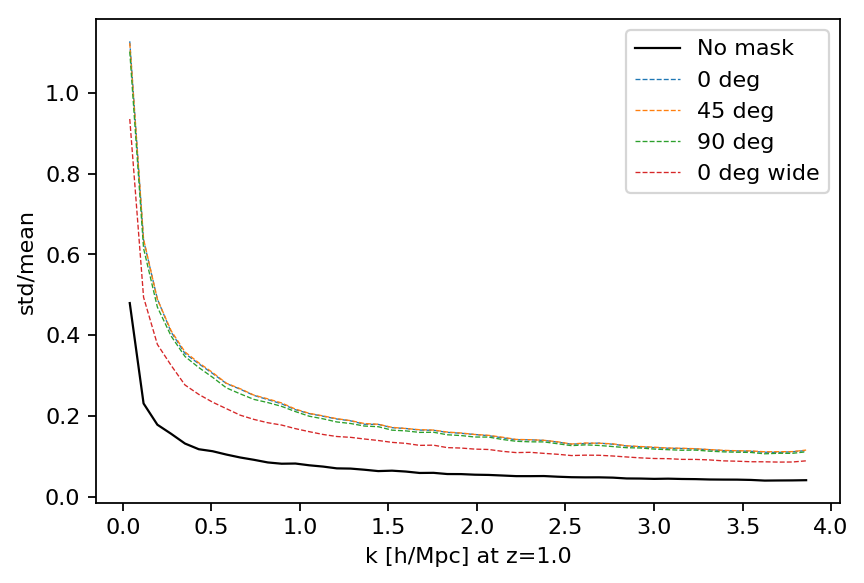

In [155]:
fig,ax=plt.subplots(figsize=(6,4), dpi=160)


plt.plot(k,stdmean(means), 'k', lw=1, label='No mask')
plt.plot(k,stdmean(means_scaned0), '--', lw=.6, label='0 deg')
plt.plot(k,stdmean(means_scaned45), '--', lw=.6, label='45 deg')
plt.plot(k,stdmean(means_scaned90), '--', lw=.6, label='90 deg')

plt.plot(k,stdmean(means_scaned0_w), '--', lw=.6, label='0 deg wide')


plt.xlabel('k [h/Mpc] at z=1.0')
plt.ylabel('std/mean')
plt.legend()


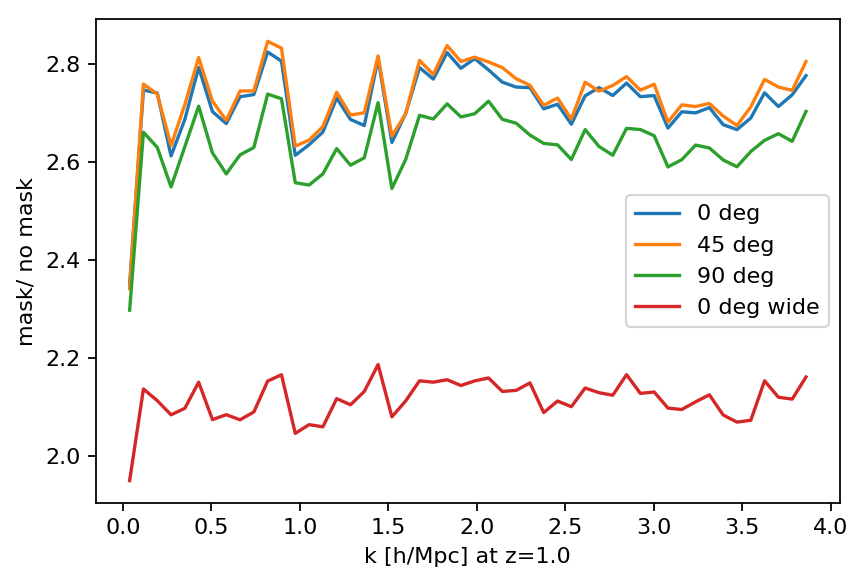

In [157]:
fig,ax=plt.subplots(figsize=(6,4), dpi=160)


plt.plot(k, stdmean(means_scaned0)/stdmean(means), label='0 deg')
plt.plot(k, stdmean(means_scaned45)/stdmean(means), label='45 deg')
plt.plot(k, stdmean(means_scaned90)/stdmean(means), label='90 deg')
plt.plot(k, stdmean(means_scaned0_w)/stdmean(means), label='0 deg wide')

# plt.axhline(y=1, c='k', ls='--')

plt.xlabel('k [h/Mpc] at z=1.0')
plt.ylabel('mask/ no mask')
plt.legend()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


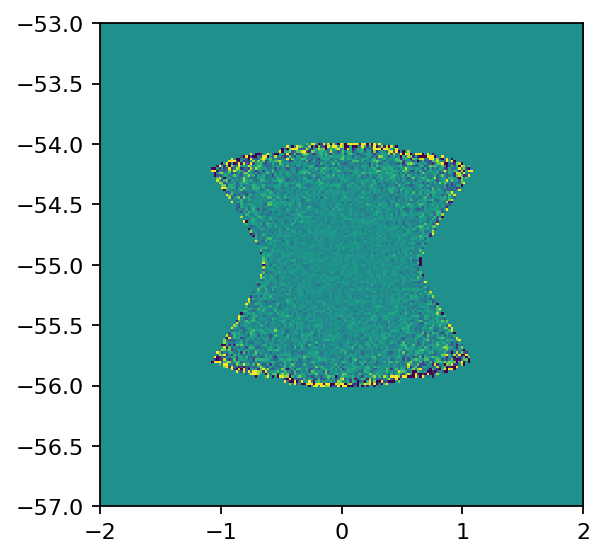

In [275]:
hmap = hit_map_0

noise = np.where(hmap>1, rand*hmap**-0.5, 0)

fig,ax=plt.subplots(figsize=(6,4), dpi=160)


rand = np.random.normal(loc=0.0, scale=1.0, size=(200,200))

plt.imshow(noise, vmin=-0.2, vmax=.2, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


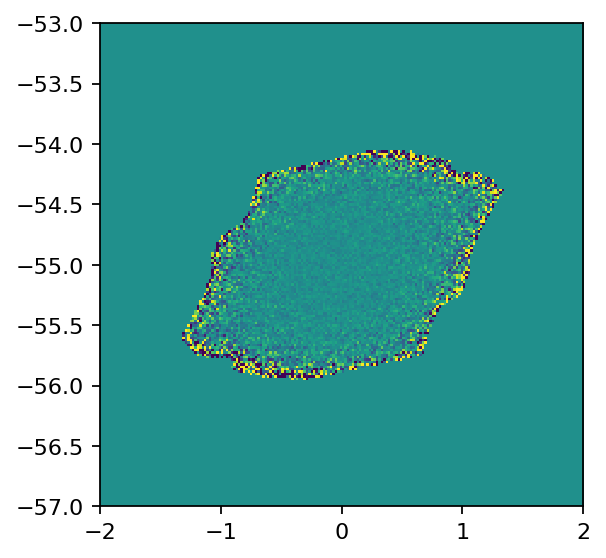

In [274]:
hmap = hit_map_45

noise = np.where(hmap>1, rand*hmap**-0.5, 0)

fig,ax=plt.subplots(figsize=(6,4), dpi=160)


rand = np.random.normal(loc=0.0, scale=1.0, size=(200,200))

plt.imshow(noise, vmin=-0.2, vmax=.2, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],)


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


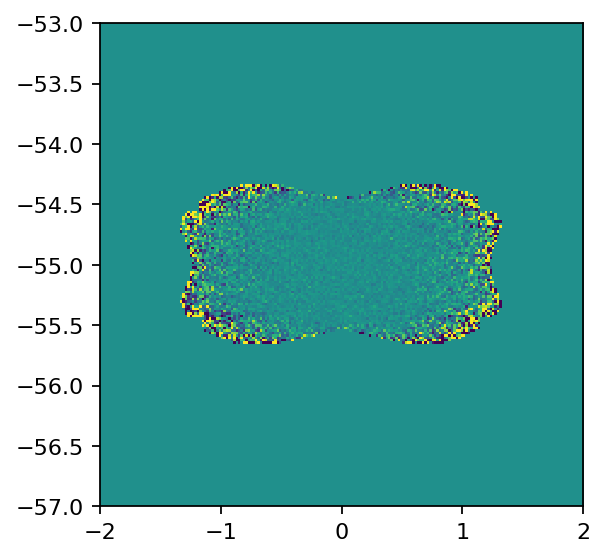

In [273]:
hmap = hit_map_90

noise = np.where(hmap>1, rand*hmap**-0.5, 0)

fig,ax=plt.subplots(figsize=(6,4), dpi=160)


rand = np.random.normal(loc=0.0, scale=1.0, size=(200,200))

plt.imshow(noise, vmin=-0.2, vmax=.2, extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],)


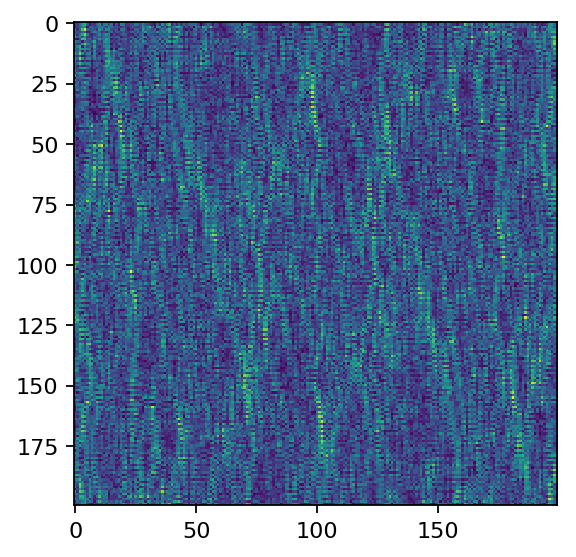

In [243]:
fig,ax=plt.subplots(figsize=(6,4), dpi=160)

ns_fft = np.abs(np.fft.fftshift((np.fft.fft2(noise))))

plt.imshow(ns_fft)

In [258]:
N = 400

hit_maps = [hit_map_0, hit_map_45, hit_map_90]
noise_lists = []

for j in range(3):
    
    hmap = hit_maps[j]
    noise_list = []
    for i in range(N):
        rand = np.random.normal(loc=0.0, scale=1.0, size=(200,200))
        noise = np.where(hmap>1, rand*hmap**-0.5, 0)
        ns_fft = np.abs(np.fft.fftshift((np.fft.fft2(noise))))


        noise_list.append(azi_mean((ns_fft)**2,2))

    noise_list = np.array(noise_list)
    noise_lists.append(noise_list)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in power
  if sys.path[0] == '':


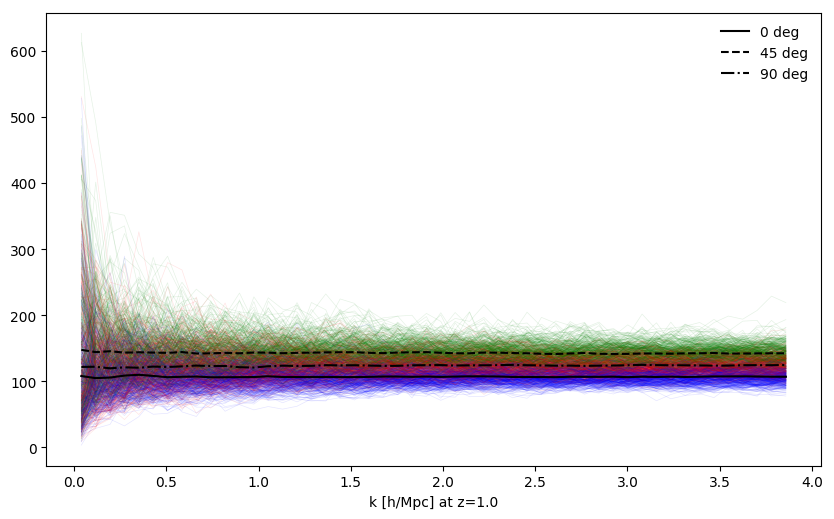

In [280]:
fig,ax=plt.subplots(figsize=(10,6), dpi=100)

for i in range(N):
    plt.plot(k, noise_lists[0][i], 'b', lw=0.5, alpha=0.1 )
    plt.plot(k, noise_lists[1][i], 'g', lw=0.5, alpha=0.1 )
    plt.plot(k, noise_lists[2][i], 'r', lw=0.5, alpha=0.1 )

plt.plot(k, np.mean(noise_lists[0], axis=0), 'k', label='0 deg')
plt.plot(k, np.mean(noise_lists[1], axis=0), 'k--', label='45 deg')
plt.plot(k, np.mean(noise_lists[2], axis=0), 'k-.', label='90 deg')

plt.xlabel('k [h/Mpc] at z=1.0')

plt.legend(frameon=0)




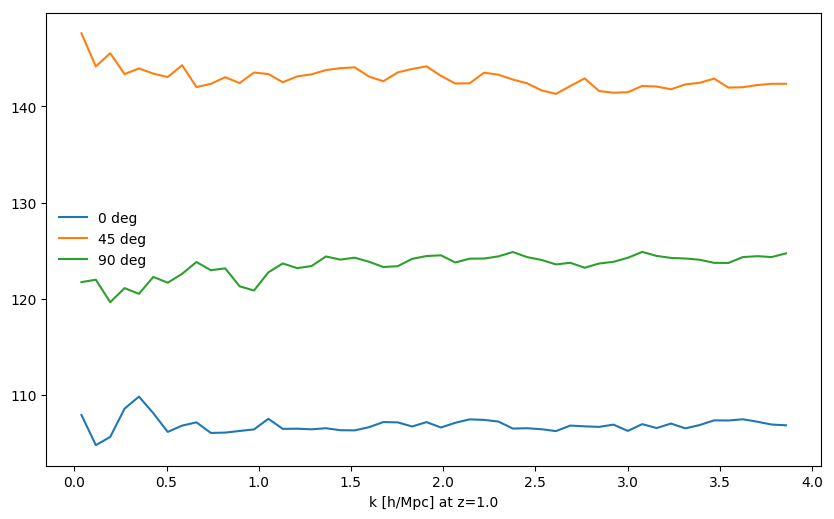

In [263]:
fig,ax=plt.subplots(figsize=(10,6), dpi=100)

labels = ['0 deg', '45 deg', '90 deg']

for j in range(3):
    plt.plot(k, np.mean(noise_lists[j], axis=0), label=labels[j])

    
plt.xlabel('k [h/Mpc] at z=1.0')
plt.legend(frameon=0)